# Diabetes Risk Assesment 
## Author: Manh Ha Nguyen - Data Science and Finance Undergraduate at University of Adelaide
### Overview
### Features information
Columns:
- Id: Unique identifier for each data entry.
- Pregnancies: Number of times pregnant.
- Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test.
- BloodPressure: Diastolic blood pressure (mm Hg).
- SkinThickness: Triceps skinfold thickness (mm).
- Insulin: 2-Hour serum insulin (mu U/ml).
- BMI: Body mass index (weight in kg / height in m^2).
- DiabetesPedigreeFunction: Diabetes pedigree function, a genetic score of diabetes.
- Age: Age in years.
- Outcome: Binary classification indicating the presence (1) or absence (0) of diabetes. 

In [2]:
# Import libraries
# Data manipulation libraries
import numpy as np
import pandas as pd

# Machine learning libraries for classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

# Model evaluation libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Load the data
data = pd.read_csv('Healthcare-Diabetes.csv')

# View general structure of the data
print(data.head())
data.info()
data.describe()


   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
0   1            6      148             72             35        0  33.6  \
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pr

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


### Exploratory Data Analysis



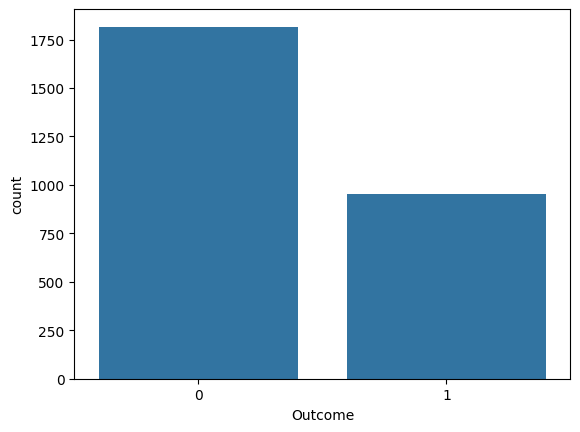

In [4]:
# Bar plot of the target variable
sns.countplot(x = data['Outcome'])
plt.show()

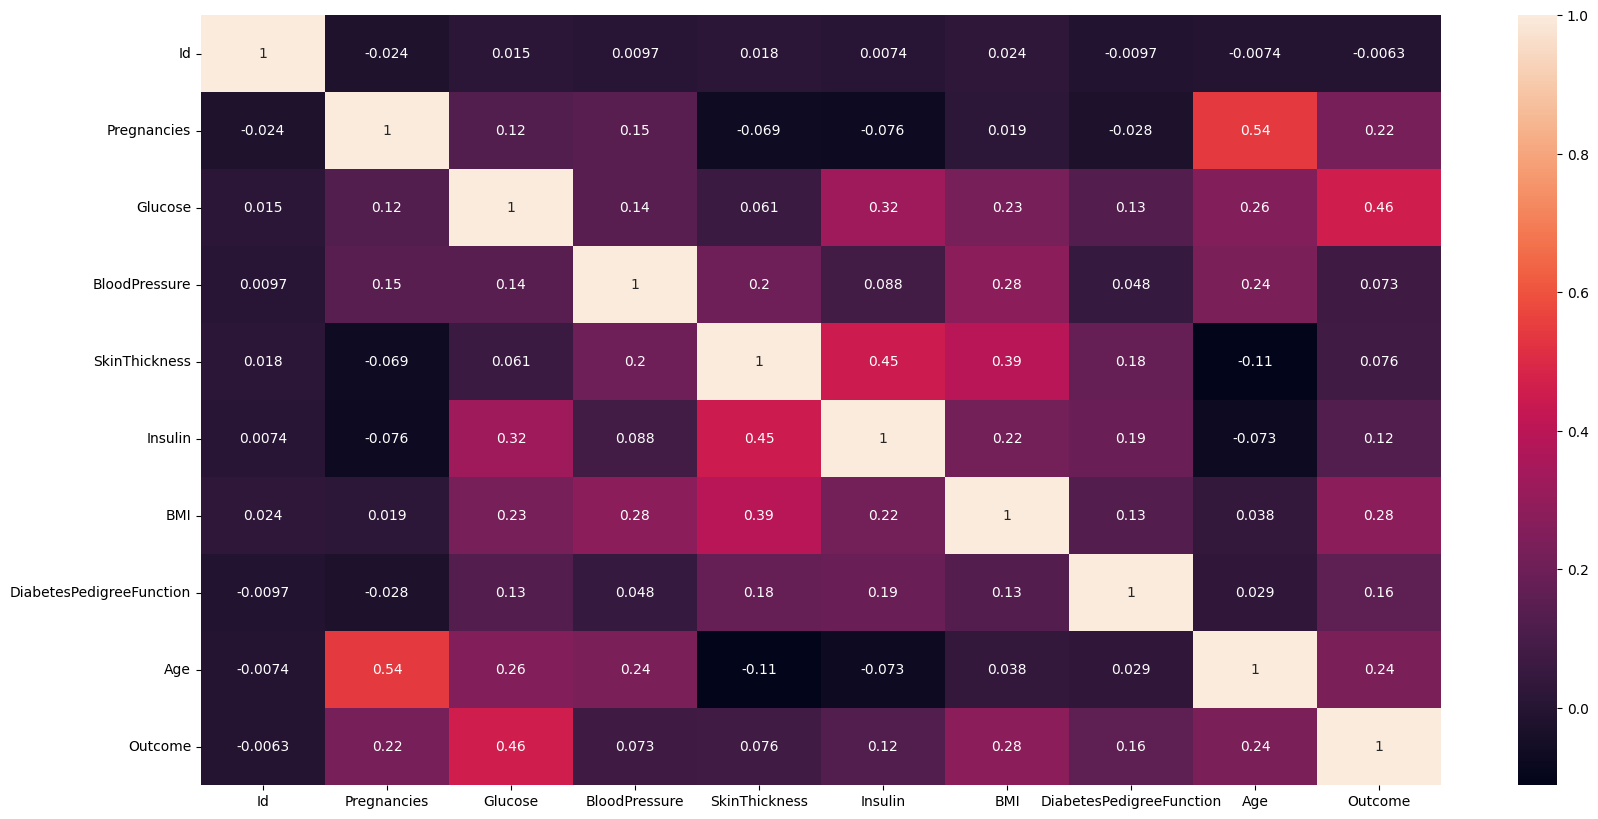

In [5]:
# Correlation heat map
corr_matrix = data.corr()
plt.figure(figsize = (20, 10))
sns.heatmap(corr_matrix, annot = True)
plt.show()


Text(0.5, 1.0, 'Distribution of diabetes by age')

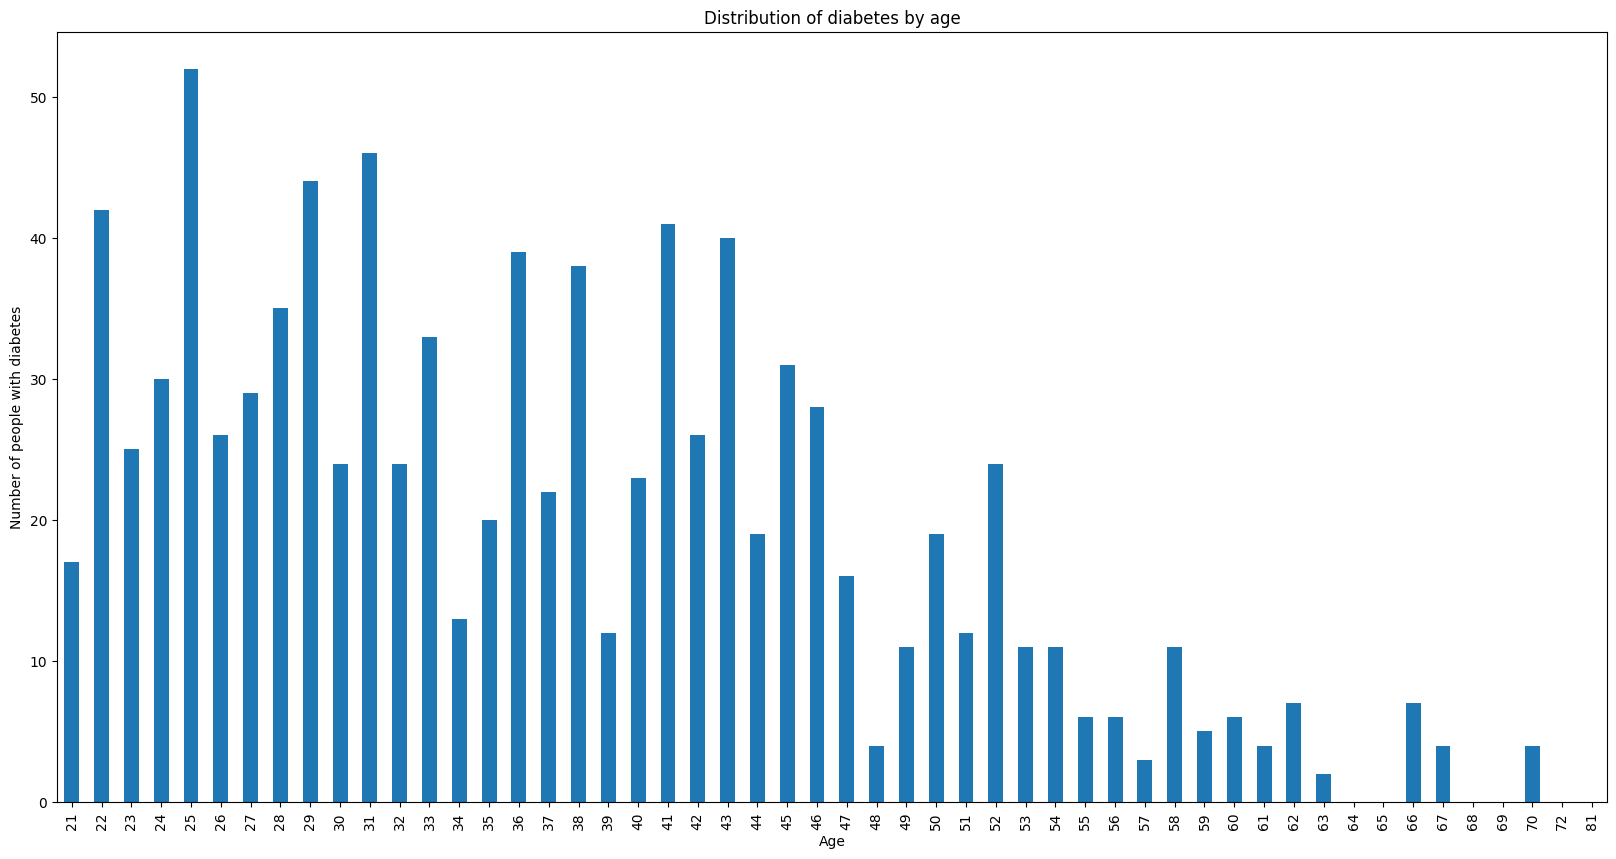

In [6]:
# Bar chart for distribution of the target variable by age
diabetes = data.groupby('Age')['Outcome'].sum()
plt.figure(figsize = (20, 10))
diabetes.plot(kind = 'bar')
plt.ylabel('Number of people with diabetes')
plt.title('Distribution of diabetes by age')


# Training Machine Learning Model for predicting diabeties outcome

In [7]:
# Preprocessing dataset
X = data.drop('Outcome', axis = 1)
X = X.drop('Id', axis = 1)
y = data['Outcome']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [8]:
logistic_pl = Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression())])
svm_pl = Pipeline([('scaler', StandardScaler()), ('svm', SVC())])
rf_pl = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())])
knn_pl = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
dt_pl = Pipeline([('scaler', StandardScaler()), ('dt', DecisionTreeClassifier())])
xgb_pl = Pipeline([('scaler', StandardScaler()), ('xgb', XGBClassifier())])

In [9]:
def calculate_metrics(y_true, y_pred):   
    rec = recall_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    accu = accuracy_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print('Recall: ', rec)
    print('Precision: ', prec)
    print('Accuracy: ', accu)
    print('AUC: ', auc)
    print('F1 Score: ', f1)
    return rec, prec, accu, auc, f1

In [10]:
logistic_model_params = {'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
logistic_model = GridSearchCV(logistic_pl, logistic_model_params, cv = 5, scoring='f1')
logistic_model.fit(X_train, y_train)
logistic_model_best = logistic_model.best_estimator_
logistic_model_best.fit(X_train, y_train)
logistic_model_best_pred = logistic_model_best.predict(X_test)
logistic_model_best_metrics = calculate_metrics(y_test, logistic_model_best_pred)

Recall:  0.5240641711229946
Precision:  0.7313432835820896
Accuracy:  0.7743682310469314
AUC:  0.7129857640356118
F1 Score:  0.6105919003115264


In [11]:
svm_model_params = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
                    'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
svm_model = GridSearchCV(svm_pl, svm_model_params, cv = 5, scoring='f1')
svm_model.fit(X_train, y_train)
svm_model_best = svm_model.best_estimator_
svm_model_best.fit(X_train, y_train)
svm_model_best_pred = svm_model_best.predict(X_test)
svm_model_best_metrics = calculate_metrics(y_test, svm_model_best_pred)

Recall:  0.9625668449197861
Precision:  0.994475138121547
Accuracy:  0.9855595667870036
AUC:  0.9799210246397295
F1 Score:  0.9782608695652174


In [12]:
rf_model_params = {'rf__n_estimators': [10, 50, 100, 200, 500],
                     'rf__max_depth': [10, 50, 100, 200, 500]}
rf_model = GridSearchCV(rf_pl, rf_model_params, cv = 5, scoring='f1')
rf_model.fit(X_train, y_train)
rf_model_best = rf_model.best_estimator_
rf_model_best.fit(X_train, y_train)
rf_model_best_pred = rf_model_best.predict(X_test)
rf_model_best_metrics = calculate_metrics(y_test, rf_model_best_pred)

Recall:  0.9625668449197861
Precision:  0.9836065573770492
Accuracy:  0.9819494584837545
AUC:  0.9771962289994025
F1 Score:  0.9729729729729729


In [13]:
knn_model_params = {'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                        'knn__weights': ['uniform', 'distance']}
knn_model = GridSearchCV(knn_pl, knn_model_params, cv = 5, scoring='f1')
knn_model.fit(X_train, y_train)
knn_model_best = knn_model.best_estimator_
knn_model_best.fit(X_train, y_train)
knn_model_best_pred = knn_model_best.predict(X_test)
knn_model_best_metrics = calculate_metrics(y_test, knn_model_best_pred)

Recall:  0.9786096256684492
Precision:  0.9945652173913043
Accuracy:  0.9909747292418772
AUC:  0.987942415014061
F1 Score:  0.9865229110512129


In [14]:
dt_model_params = {'dt__max_depth': [10, 50, 100, 200, 500],
                        'dt__min_samples_split': [2, 5, 10]}
dt_model = GridSearchCV(dt_pl, dt_model_params, cv = 5, scoring='f1')
dt_model.fit(X_train, y_train)
dt_model_best = dt_model.best_estimator_
dt_model_best.fit(X_train, y_train)
dt_model_best_pred = dt_model_best.predict(X_test)
dt_model_best_metrics = calculate_metrics(y_test, dt_model_best_pred)

Recall:  0.9625668449197861
Precision:  0.9782608695652174
Accuracy:  0.98014440433213
AUC:  0.9758338311792389
F1 Score:  0.9703504043126684


In [15]:
xgb_model_params = {'xgb__n_estimators': [10, 50, 100, 200, 500],
                        'xgb__max_depth': [10, 50, 100, 200, 500]}
xgb_model = GridSearchCV(xgb_pl, xgb_model_params, cv = 5, scoring='f1')
xgb_model.fit(X_train, y_train)
xgb_model_best = xgb_model.best_estimator_
xgb_model_best.fit(X_train, y_train)
xgb_model_best_pred = xgb_model_best.predict(X_test)
xgb_model_best_metrics = calculate_metrics(y_test, xgb_model_best_pred)

Recall:  0.9625668449197861
Precision:  0.9836065573770492
Accuracy:  0.9819494584837545
AUC:  0.9771962289994025
F1 Score:  0.9729729729729729


#### Save the best model

In [16]:
import pickle

# Save the model
pickle.dump(knn_model_best, open('knn_diabeties_model.pkl', 'wb'))